# Initial Data Cleaning

Objective:

- Clean location, salary, titles 
- Make sure data size is large enough
- Clean JD 
    - Remove stop words
    - basic tokenization
    - get most frequently used words
    - create bigrams, or ngrams, or bag or words
    - count vectorization

In [62]:
import time
import nltk
from nltk.corpus import stopwords

from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *
import string, re

from gensim.models import Word2Vec

from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
np.random.seed(0)

## Concat all jobs together

In [0]:
"""

import time, glob

#Iterate through list of filenames and read each in
outfilename = 'all_' + str((int(time.time()))) + ".csv"

filenames = glob.glob('*.csv')

import shutil

with open(outfilename, 'wb') as outfile:
    for filename in glob.glob('*.csv'):
        if filename == outfilename:
            # don't want to copy the output into the output
            continue
        with open(filename, 'rb') as readfile:
            shutil.copyfileobj(readfile, outfile)
            
outfile
            
"""


<_io.BufferedWriter name='all_1589642043.csv'>

In [2]:
df = pd.read_csv('all_1589665998.csv', encoding='latin-1')

In [3]:
df.head(10)

,Unnamed: 0,Title,Company,Location,Link,Review,Salary,Description
0,0.0,Data Scientist,Lockheed Martin,"Arlington, VA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,4,None,Description:Are you ready to take your career ...
1,1.0,Support Scientist Ocean Data Assimilation (HAFS),IMSG/NOAA,"Arlington, VA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,None,None,"Overview I.M. Systems Group, Inc. (IMSG) is se..."
2,2.0,"2021048 Data Scientist $215,000.00",B4CORP,"Arlington, VA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,None,"Up to $215,000 a year",Position Requires a Top Secret (TS/SCI) Cleara...
3,3.0,Senior Data Engineer - Data Quality and Monito...,Freddie Mac,"Arlington, VA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,3.8,None,Are you passionate to work with the most valua...
4,4.0,Chief Scientist Machine Learning,Leidos,"Arlington, VA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,3.7,None,Description\rJob Description:\rThe Leidos Arti...
5,5.0,Data Scientist,Jobot,"Arlington, VA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5,None,This Jobot Job is hosted by: Ellina Oganyan\rA...
6,6.0,Data Science/Data Analyst,CRAiC LLC,"Arlington, VA",https://www.indeed.com/company/CRAiC-LLC/jobs/...,None,"$60,000 a year",Cost Readiness Analytics (CRAiC LLC) is lookin...
7,7.0,"Intern, Data Science",K12 INC,"Arlington, VA",https://www.indeed.com/rc/clk?jk=bef612d2289d1...,3.2,None,About us\rK12 Produces Results\rKudos and Hono...
8,8.0,Data Science Intern,MilliporeSigma,"Arlington, VA",https://www.indeed.com/company/Serono/jobs/Dat...,3.9,$20 - $25 an hour,Job Title: Data Science Intern\rA career with ...
9,9.0,"Data Scientist, Junior",Booz Allen Hamilton,"Arlington, VA",https://www.indeed.com/rc/clk?jk=b7b426b3b63eb...,3.9,None,The Challenge:\rAre you excited at the prospec...


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12155 entries, 0 to 12154
Data columns (total 7 columns):
Title          12155 non-null object
Company        12151 non-null object
Location       12155 non-null object
Link           12155 non-null object
Review         12155 non-null object
Salary         12155 non-null object
Description    12155 non-null object
dtypes: object(7)
memory usage: 664.9+ KB


###  Remove Duplicates

In [6]:
df2 = df.drop_duplicates(subset='Link', keep = 'first', inplace = False)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7066 entries, 0 to 12034
Data columns (total 7 columns):
Title          7066 non-null object
Company        7064 non-null object
Location       7066 non-null object
Link           7066 non-null object
Review         7066 non-null object
Salary         7066 non-null object
Description    7066 non-null object
dtypes: object(7)
memory usage: 441.6+ KB


In [8]:
df2.groupby('Location').count().sort_values(by='Salary', ascending=True);

In [9]:
def rename_location(x):
    if "New York" in x:
        y = "New York, NY"
    else: 
        y = x
    return y

In [10]:
df2['Location2'] = df2['Location'].apply(rename_location)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df2.to_csv("job_data_1.csv")

In [12]:
df2 = pd.read_csv("job_data_1.csv")

In [13]:
df2.head(10)

,Unnamed: 0,Title,Company,Location,Link,Review,Salary,Description,Location2
0,0,Data Scientist,Lockheed Martin,"Arlington, VA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,4,None,Description:Are you ready to take your career ...,"Arlington, VA"
1,1,Support Scientist Ocean Data Assimilation (HAFS),IMSG/NOAA,"Arlington, VA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,None,None,"Overview I.M. Systems Group, Inc. (IMSG) is se...","Arlington, VA"
2,2,"2021048 Data Scientist $215,000.00",B4CORP,"Arlington, VA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,None,"Up to $215,000 a year",Position Requires a Top Secret (TS/SCI) Cleara...,"Arlington, VA"
3,3,Senior Data Engineer - Data Quality and Monito...,Freddie Mac,"Arlington, VA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,3.8,None,Are you passionate to work with the most valua...,"Arlington, VA"
4,4,Chief Scientist Machine Learning,Leidos,"Arlington, VA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,3.7,None,Description\rJob Description:\rThe Leidos Arti...,"Arlington, VA"
5,5,Data Scientist,Jobot,"Arlington, VA",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5,None,This Jobot Job is hosted by: Ellina Oganyan\rA...,"Arlington, VA"
6,6,Data Science/Data Analyst,CRAiC LLC,"Arlington, VA",https://www.indeed.com/company/CRAiC-LLC/jobs/...,None,"$60,000 a year",Cost Readiness Analytics (CRAiC LLC) is lookin...,"Arlington, VA"
7,7,"Intern, Data Science",K12 INC,"Arlington, VA",https://www.indeed.com/rc/clk?jk=bef612d2289d1...,3.2,None,About us\rK12 Produces Results\rKudos and Hono...,"Arlington, VA"
8,8,Data Science Intern,MilliporeSigma,"Arlington, VA",https://www.indeed.com/company/Serono/jobs/Dat...,3.9,$20 - $25 an hour,Job Title: Data Science Intern\rA career with ...,"Arlington, VA"
9,9,"Data Scientist, Junior",Booz Allen Hamilton,"Arlington, VA",https://www.indeed.com/rc/clk?jk=b7b426b3b63eb...,3.9,None,The Challenge:\rAre you excited at the prospec...,"Arlington, VA"


In [14]:
df2.Salary.unique()

array(['None', 'Up to $215,000 a year', '$60,000 a year',
       '$20 - $25 an hour', '$70,000 - $85,000 a year',
       '$45 - $55 an hour', '$102,663 - $157,709 a year',
       '$40 - $60 an hour', '$21.93 - $26.43 an hour',
       '$40,000 - $60,000 a year', '$82,326 - $105,339 a year',
       '$45 an hour', '$1,200 - $4,200 a month',
       '$100,000 - $150,000 a year', '$140,000 - $175,000 a year',
       '$67,968 - $126,062 a year', '$75 - $100 an hour',
       '$121,316 - $157,709 a year', '$72,030 - $137,012 a year',
       'Up to $125,000 a year', '$1,000 a month', '$130,000 a year',
       '$27.17 - $36.60 an hour', '$120,000 - $170,000 a year',
       'Up to $100,000 a year', '$120,000 - $150,000 a year',
       '$40,000 - $50,000 a year', '$190,000 a year', '$20 - $27 an hour',
       '$50 - $55 an hour', '$100,000 - $145,000 a year',
       '$160,000 - $175,000 a year', '$70,000 - $80,000 a year',
       '$85,000 - $165,000 a year', '$145,000 - $165,000 a year',
       '$1

### Subset dataframe with Salary info

In [15]:
salary_df = df2[df2['Salary']!= 'None'].drop(['Location','Unnamed: 0'], axis = 1)

In [16]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 7261
Data columns (total 7 columns):
Title          981 non-null object
Company        964 non-null object
Link           964 non-null object
Review         964 non-null object
Salary         964 non-null object
Description    964 non-null object
Location2      959 non-null object
dtypes: object(7)
memory usage: 72.6+ KB


We have 964 jobs with salary info. Let's look at their titles.

In [17]:
salary_list = salary_df['Salary'].unique().tolist()

##### Adjust Hourly and Daily Salary to Yearly

In [18]:
def salary_base(x):
    y=""
    if "year" in str(x):
        y = "Yearly"
    if "hour" in str(x):
        y = "Hourly"
    if "day" in str(x):
        y = "Daily"
    elif "month" in str(x):
        y = "Monthly"
    
    return y
        

In [19]:
salary_df['Rate_by'] = salary_df['Salary'].apply(salary_base)

In [20]:
salary_df = salary_df[salary_df['Rate_by']!=""]

In [21]:
indexNames = salary_df[salary_df['Rate_by']==""].index
 
# Delete these row indexes from dataFrame
salary_df.drop(indexNames , inplace=True)

In [22]:
salary_df.reset_index(drop=True);

In [23]:
salary_df.groupby('Rate_by').Salary.count()

Rate_by
Daily        1
Hourly     294
Monthly     31
Yearly     637
Name: Salary, dtype: int64

### Split the cell and use regular expression to identify only numbers.

In [24]:
a = "From $69,415 a year" 


pattern = '\$[0-9]*[.,]?[0-9]*'
p = re.compile(pattern)
digits = p.findall(a)
digits

['$69,415']

In [25]:
salary_list;

In [26]:
salary_df[['low','high']] = salary_df.Salary.str.split('-', expand=True)

In [27]:
salary_df[['Rate_by','low','high']]

,Rate_by,low,high
2,Yearly,"Up to $215,000 a year",None
6,Yearly,"$60,000 a year",None
8,Hourly,$20,$25 an hour
11,Yearly,"$70,000","$85,000 a year"
16,Hourly,$45,$55 an hour
...,...,...,...
7192,Yearly,"$108,000","$118,000 a year"
7199,Yearly,"$89,000","$99,000 a year"
7208,Yearly,"$89,000","$99,000 a year"
7212,Yearly,"$80,000","$90,000 a year"


In [28]:
def find_salary(a):
    if a:
        pattern = '\$[0-9]*[.,]?[0-9]*'
        p = re.compile(pattern)
        digits = p.findall(a)
        new1 = digits[0].replace("$","")
        new2 = new1.replace(",","")
        
        return float(new2)
    else:
        return 0

In [29]:
salary_df['min'] = salary_df['low'].apply(find_salary)

In [30]:
salary_df['max'] = salary_df['high'].apply(find_salary)

In [31]:
salary_df.head();

In [32]:
salary_df.to_csv("salary_df_5.20.csv")

### Calculate the adjusted salary (turn all daily/hourly wage to yearly), use average

In [33]:
#Calculate average salary
def adjust_salary(a, b):
    adjusted_salary=[]
    for x, y in zip(a,b):
        if y > 0:
            avg_salary = (x+y)/2
        
        else:
            avg_salary = x
            
        adjusted_salary.append(avg_salary)
        
    return adjusted_salary               

In [34]:
salary_df['adjusted_salary'] = adjust_salary(salary_df['min'], salary_df['max'])

In [35]:
#turn hourly, daily and monthly wage to yearly 
def adjust_salary2(m,n):
    adjusted_yearly_salary = []
    for x, y in zip(m,n):
        if x == "Yearly":
            yearly_salary = y
        if x == "Monthly":
            yearly_salary = y*12
        if x == "Hourly":
            yearly_salary = y*40*52
        if x == "Daily":
            yearly_salary = y*5*52
            
        adjusted_yearly_salary.append(yearly_salary)
        
    return adjusted_yearly_salary
        

In [36]:
salary_df['adjusted_yearly_salary'] = adjust_salary2(salary_df['Rate_by'], salary_df['adjusted_salary'])

In [37]:
salary_df.Location2.unique()

array(['Arlington, VA', 'Atlanta, GA', nan, 'Austin, TX', 'Boston, MA',
       'Cambridge, MA', 'Charlotte, NC', 'Chicago, IL', 'Dallas, TX',
       'Denver, CO', 'Hartford, CT', 'Houston, TX', 'Irving, TX',
       'Los Angeles, CA', 'Miami, FL ', 'New York, NY', 'Palo Alto, CA',
       'Philadelphia, PA', 'Pittsburg, PA', 'Portland, OR',
       'Raleigh-Durham, NC', 'San Antonio, TX', 'San Francisco, CA',
       'San Jose, CA', 'Seattle, WA', 'Washington, DC'], dtype=object)

In [38]:
col_list = ['Title','Company','Review','Description','adjusted_yearly_salary','Location2','Rate_by']
salary_df[col_list]

,Title,Company,Review,Description,adjusted_yearly_salary,Location2,Rate_by
2,"2021048 Data Scientist $215,000.00",B4CORP,None,Position Requires a Top Secret (TS/SCI) Cleara...,215000.0,"Arlington, VA",Yearly
6,Data Science/Data Analyst,CRAiC LLC,None,Cost Readiness Analytics (CRAiC LLC) is lookin...,60000.0,"Arlington, VA",Yearly
8,Data Science Intern,MilliporeSigma,3.9,Job Title: Data Science Intern\rA career with ...,46800.0,"Arlington, VA",Hourly
11,Jr. Data Scientist,Numero Data LLC,None,Ideal candidate should have a degree in a quan...,77500.0,"Arlington, VA",Yearly
16,Business Data Quality Engineer,HRU Technical Resources,None,Please note that this is not a corp to corp or...,104000.0,"Arlington, VA",Hourly
...,...,...,...,...,...,...,...
7192,Data Engineering II,Pueo Business Solutions,5,Data Engineering II\rSalary: $108K-$118K\rClea...,113000.0,"Washington, DC",Yearly
7199,IR Day Shift,Pueo Business Solutions,5,Tier 2 IR Day Shift\rSalary Range: $89K-$99K\r...,94000.0,"Washington, DC",Yearly
7208,Security Engineer,Pueo Business Solutions,5,Security Engineer\rSalary Range: $89K-$99K\rCl...,94000.0,"Washington, DC",Yearly
7212,FDP Analyst,GC Associates USA,None,"Position Title: FDP Analyst\rCustomer: HQDA, G...",85000.0,"Washington, DC",Yearly


In [39]:
salary_df = salary_df.drop_duplicates(subset="Link", keep='first')

Create salary bins 

In [40]:
BINS = [0,50000,70000,90000,120000,150000,400000]

salary_df['Salary_Bins'] = pd.cut(x=salary_df['adjusted_yearly_salary'], bins=BINS, labels=False)

In [41]:
salary_df['Salary_Bins']

2       5
6       1
8       0
11      2
16      3
       ..
7192    3
7199    3
7208    3
7212    2
7261    2
Name: Salary_Bins, Length: 963, dtype: int64

([<matplotlib.axis.XTick at 0x12dd864a8>,
 <a list of 6 Text xticklabel objects>)

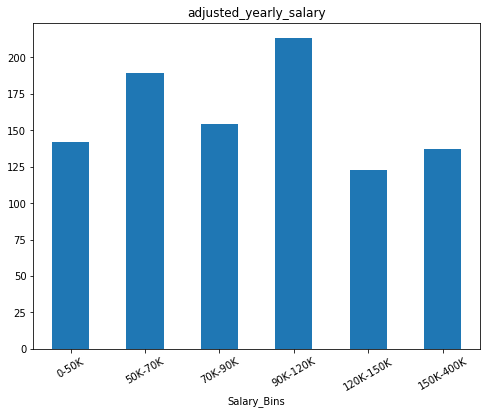

In [49]:
plt.figure(figsize=(8,6))
salary_df.groupby('Salary_Bins')['Location2'].count().plot.bar()
plt.title("adjusted_yearly_salary")
plt.xticks([0,1,2,3,4,5],['0-50K','50K-70K','70K-90K','90K-120K','120K-150K','150K-400K'], rotation=30)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


Text(0.5, 1.0, 'Median Salary by Location')

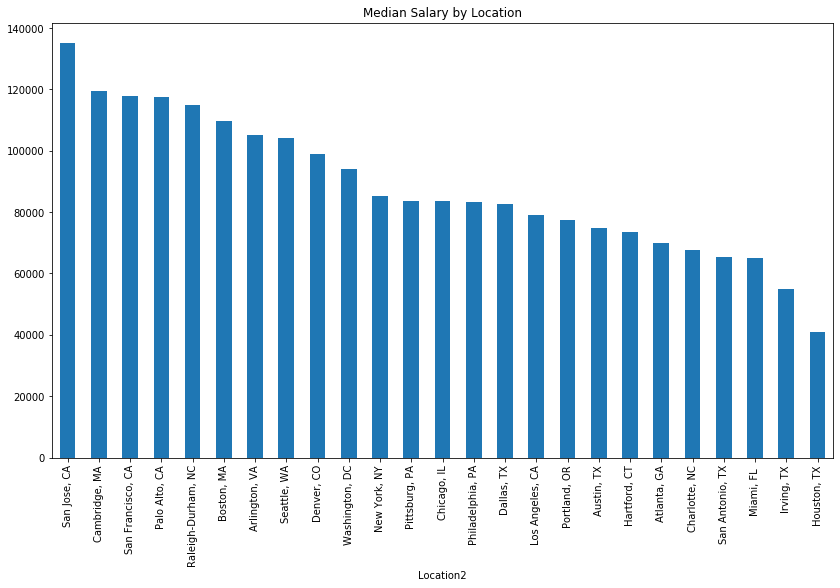

In [50]:
#Which city tends to have the highest medium salary?

plt.figure(figsize=(14,8))
city_salary = salary_df.groupby('Location2')['adjusted_yearly_salary'].median()
city_salary.to_csv("salary_by_city.csv")
city_salary.sort_values(ascending=False).plot.bar()

plt.title("Median Salary by Location")

### Join with Cost of Living Index

In [57]:
COI = pd.read_excel("CostofLiving2020.xlsx")

In [58]:
COI.head()

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,"New York, NY",100.00,100.00,100.00,100.00,100.00,100.00
1,2,"San Francisco, CA",91.51,115.58,103.02,86.91,94.45,135.90
2,3,"Palo Alto, CA",91.51,115.58,103.02,86.91,94.45,135.90
3,4,"Anchorage, AK",91.36,38.94,66.29,88.42,78.89,118.44
4,5,"Honolulu, HI",89.70,63.03,76.94,89.83,83.60,88.29


In [59]:
COI[COI['City']=="Miami, FL"]

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
26,27,"Miami, FL",74.16,57.56,66.22,67.44,78.44,100.26


In [60]:
df = salary_df.merge(COI, left_on='Location2', right_on='City', how = 'left')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 962
Data columns (total 23 columns):
Title                             963 non-null object
Company                           963 non-null object
Link                              963 non-null object
Review                            963 non-null object
Salary                            963 non-null object
Description                       963 non-null object
Location2                         958 non-null object
Rate_by                           963 non-null object
low                               963 non-null object
high                              762 non-null object
min                               963 non-null float64
max                               963 non-null float64
adjusted_salary                   963 non-null float64
adjusted_yearly_salary            963 non-null float64
Salary_Bins                       963 non-null int64
Rank                              939 non-null float64
City                       

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


Text(0.5, 1.0, 'Median Cost of Living Index by Location')

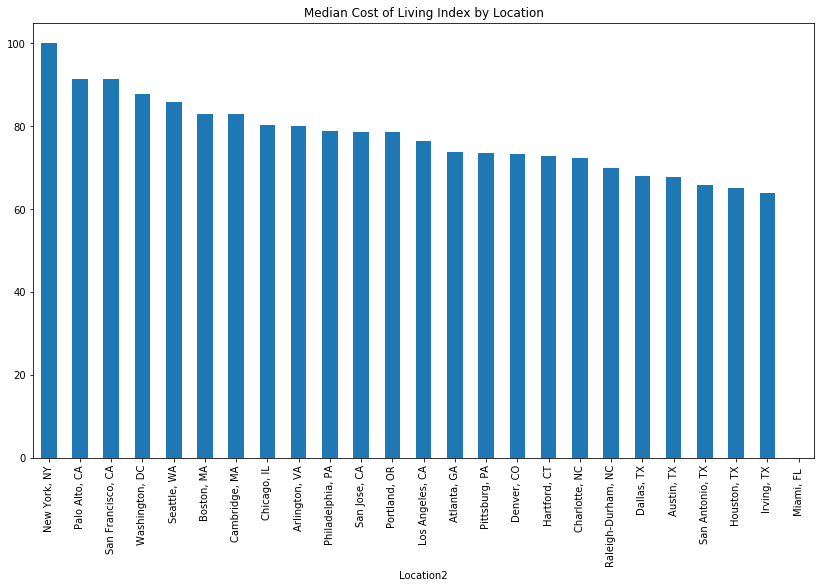

In [56]:
plt.figure(figsize=(14,8))

city_COI = df.groupby('Location2')['Cost of Living Index'].median()
city_COI.sort_values(ascending=False).plot.bar()
city_COI.to_csv("city_COI.csv")

plt.title("Median Cost of Living Index by Location")

Create bins for city: Low Cost of Living, Medium Cost of Living, High Cost of Living

In [63]:
df['Cost of Living Index'].quantile(list(np.linspace(0,1,4)))

0.000000     63.82
0.333333     76.55
0.666667     82.88
1.000000    100.00
Name: Cost of Living Index, dtype: float64

In [64]:
#Create Bins, 0 = low cost of living; 1 = medium cost of living; 2 = high cost of living
BINS = [63,76.55,82.88,100]

df['City_Bins'] = pd.cut(x=df['Cost of Living Index'], bins=BINS, labels=["low","medium","high"])

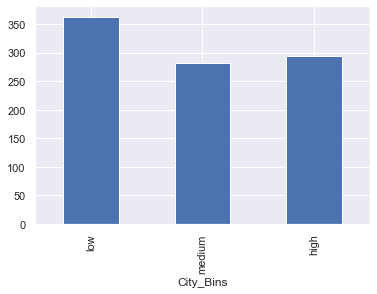

In [65]:
df.groupby('City_Bins')['Location2'].count().plot.bar()

In [66]:
df.groupby('Salary_Bins')['Location2'].count()

Salary_Bins
0    142
1    189
2    154
3    213
4    123
5    137
Name: Location2, dtype: int64

#### Explore Title

In [67]:
df['Title'].unique()

array(['2021048 Data Scientist $215,000.00', 'Data Science/Data Analyst',
       'Data Science Intern', 'Jr. Data Scientist',
       'Business Data Quality Engineer', 'Data Scientist',
       'Machine Learning / C++ Engineer (DoD Clearance Required)',
       'Undergraduate Internship/Co-op Program - Data Scientist',
       'Data Science Community Lead', 'Data Analyst/Data Scientist',
       'Self-employed Hardware/ Data Centre Field Engineer',
       'DATA SCIENCE & TAGGING ANALYST', 'Data Engineer',
       'HPC / Computational Data Scientist with Clearance',
       'Operations Research Analyst (Data Scientist)',
       'Social Science Analyst', 'Data Center Engineer',
       'Data Scientist II', 'Graduate Studies Program - Data Scientist',
       'Machine Learning Data Engineer',
       '2021049 Data Scientist $100,000.00', 'Principal Data Scientist',
       'Data Center Technician/Customer Engineer',
       'Experienced Data Scientist (locals only)',
       'Systems Engineer / Data A

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
y = df['Salary_Bins'].astype('category')

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df['Title'], y, test_size=0.2)

In [71]:
#use count vectorizer to examine title

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', ngram_range=(1,3), min_df=0.03)

In [72]:
#fitting count vectorizer to job title

cv.fit(X_train)

title_words = pd.DataFrame(cv.transform(X_train).todense(), columns=cv.get_feature_names())

In [73]:
title_words

,analyst,analytics,business,business analyst,data,data analyst,data engineer,data scientist,digital,director,...,machine learning,manager,marketing,sales,science,scientist,senior,senior data,software,software engineer
0,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
766,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
word_observe = pd.concat([title_words, y_train], axis=1)

word_observe.head()

,analyst,analytics,business,business analyst,data,data analyst,data engineer,data scientist,digital,director,...,manager,marketing,sales,science,scientist,senior,senior data,software,software engineer,Salary_Bins
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [96]:
for i in range(0,6):
    word_count = word_observe[word_observe['Salary_Bins']==i].sum(axis=0)
    print(i, "Bin most common words:")
    cw = word_count.sort_values(ascending=False).head(30)
    print(cw)

0 Bin most common words:
data                 33.0
analyst              27.0
engineer             25.0
business             18.0
data engineer        12.0
senior               12.0
manager              11.0
marketing             9.0
business analyst      9.0
sales                 6.0
data analyst          6.0
scientist             5.0
senior data           5.0
data scientist        5.0
science               4.0
software              4.0
analytics             3.0
software engineer     3.0
digital               3.0
learning              2.0
machine               2.0
machine learning      2.0
director              1.0
Salary_Bins           0.0
dtype: float64
1 Bin most common words:
Salary_Bins          146.0
analyst               47.0
data                  35.0
business              24.0
engineer              18.0
senior                17.0
business analyst      16.0
scientist             15.0
data scientist        15.0
marketing             11.0
director               9.0
software      

We can see that director, manager, senior have more frequency in higher salary bins, while analyst, marketing appear more in lower salary bins. 

In [76]:
#Combine Title with the Description
df['combined_text'] = df['Title'].str.cat(df['Description'], sep = ' ')

In [77]:
df['combined_text'][3]

'Jr. Data Scientist Ideal candidate should have a degree in a quantitative field (e.g., mathematics, computer science, physics, economics, engineering, statistics, operations research, quantitative social science, etc.).\rBasic Knowledge on software development principles and architecture.\rGood analytical and problem-solving abilities.\rAbility to break down and understand complex business problems, define a solution and implement it using advanced quantitative methods.\rFamiliarity with programming for data analysis; ideally Python, SQL, or R.\rSolid oral and written communication skills, especially around analytical concepts and methods.\rGreat work ethic and intellectual curiosity.\rKnowledge of Cloud technologies such as AWS or Google Cloud.\rKnowledge of any relational database such as My SQL.\rMust be a team player with excellent communication and problem-solving skills and have experience working with customers across teams.\rRequired Skills: -\r- Bachelor s/Master s degree in 

In [78]:
df.head()

,Title,Company,Link,Review,Salary,Description,Location2,Rate_by,low,high,...,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,City_Bins,combined_text
0,"2021048 Data Scientist $215,000.00",B4CORP,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,None,"Up to $215,000 a year",Position Requires a Top Secret (TS/SCI) Cleara...,"Arlington, VA",Yearly,"Up to $215,000 a year",None,...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,medium,"2021048 Data Scientist $215,000.00 Position Re..."
1,Data Science/Data Analyst,CRAiC LLC,https://www.indeed.com/company/CRAiC-LLC/jobs/...,None,"$60,000 a year",Cost Readiness Analytics (CRAiC LLC) is lookin...,"Arlington, VA",Yearly,"$60,000 a year",None,...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,medium,Data Science/Data Analyst Cost Readiness Analy...
2,Data Science Intern,MilliporeSigma,https://www.indeed.com/company/Serono/jobs/Dat...,3.9,$20 - $25 an hour,Job Title: Data Science Intern\rA career with ...,"Arlington, VA",Hourly,$20,$25 an hour,...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,medium,Data Science Intern Job Title: Data Science In...
3,Jr. Data Scientist,Numero Data LLC,https://www.indeed.com/company/Numero-Data-LLC...,None,"$70,000 - $85,000 a year",Ideal candidate should have a degree in a quan...,"Arlington, VA",Yearly,"$70,000","$85,000 a year",...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,medium,Jr. Data Scientist Ideal candidate should have...
4,Business Data Quality Engineer,HRU Technical Resources,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,None,$45 - $55 an hour,Please note that this is not a corp to corp or...,"Arlington, VA",Hourly,$45,$55 an hour,...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,medium,Business Data Quality Engineer Please note tha...


In [64]:
df.to_csv("salary_final.csv")

# Processing Text Data and Create Frequency Distributions

### Helper Functions to clean text data

* Do we remove stop words or not?
* Do we stem or lemmatize our text data, or leave the words as is?
* Is basic tokenization enough, or do we need to support special edge cases through the use of regex?
* Do we use the entire vocabulary, or just limit the model to a subset of the most frequently used words? If so, how many?
* Do we engineer other features, such as bigrams, or POS tags, or Mutual Information Scores?
* What sort of vectorization should we use in our model? Boolean Vectorization? Count Vectorization? TF-IDF? More advanced vectorization strategies such as Word2Vec?

In [79]:
def clean_word(job_descriptions):
    jd_data=[]
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    stopwords_list = stopwords.words('english')
    stopwords_list += list(string.punctuation)
    stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    
    for jd in job_descriptions:
        jd_tokens_raw = nltk.regexp_tokenize(jd, pattern)
        jd_tokens=[word.lower() for word in jd_tokens_raw]
        jd_words_stopped = [word for word in jd_tokens if word not in stopwords_list]
        jd_data.append(jd_words_stopped)
    return pd.Series(jd_data) # Turn list of lists to series of lists to use in Word2Vec

In [80]:
job_tokens = clean_word(df['combined_text'])

In [81]:
all_tokens = [word for job in job_tokens for word in job]

In [82]:
#Most common 50 words
job_tokens_freq = FreqDist(all_tokens)
job_tokens_freq.most_common(100)

[('data', 4961),
 ('experience', 4802),
 ('work', 3354),
 ('business', 2598),
 ('required', 2146),
 ('years', 1931),
 ('job', 1870),
 ('time', 1866),
 ('skills', 1846),
 ('team', 1767),
 ('management', 1679),
 ('ability', 1470),
 ('preferred', 1441),
 ('marketing', 1400),
 ('development', 1314),
 ('year', 1300),
 ('company', 1229),
 ('knowledge', 1178),
 ('requirements', 1172),
 ('position', 1167),
 ('benefits', 1166),
 ('insurance', 1144),
 ('information', 1131),
 ('analysis', 1118),
 ('including', 1099),
 ('full', 1089),
 ('analytics', 1080),
 ('support', 1067),
 ('salary', 1026),
 ('must', 1026),
 ('working', 993),
 ('education', 986),
 ('new', 979),
 ('strong', 969),
 ('analyst', 930),
 ('technical', 929),
 ('may', 926),
 ('systems', 901),
 ('apply', 892),
 ('health', 860),
 ('related', 856),
 ('degree', 844),
 ('sales', 824),
 ('software', 781),
 ('customer', 781),
 ('science', 777),
 ('develop', 772),
 ('design', 767),
 ('location', 764),
 ('provide', 741),
 ('services', 738),
 (

While some of them are relevant, not all of them are informational.

**Size of the total vocabulary in all jobs**

In [83]:
len(job_tokens_freq)

13283

### Normalized Frequency

Divide each word frequency by the total number of words.

In [84]:
total_word_count = sum(job_tokens_freq.values())
job_top_100 = job_tokens_freq.most_common(100)
print('Word\t\t\tNormalized Frequency')
for word in job_top_100:
    normalized_frequency = word[1]/total_word_count
    print('{} \t\t\t {:.4}'.format(word[0], normalized_frequency))

Word			Normalized Frequency
data 			 0.01424
experience 			 0.01379
work 			 0.00963
business 			 0.007459
required 			 0.006162
years 			 0.005544
job 			 0.005369
time 			 0.005358
skills 			 0.0053
team 			 0.005073
management 			 0.004821
ability 			 0.004221
preferred 			 0.004137
marketing 			 0.00402
development 			 0.003773
year 			 0.003733
company 			 0.003529
knowledge 			 0.003382
requirements 			 0.003365
position 			 0.003351
benefits 			 0.003348
insurance 			 0.003285
information 			 0.003247
analysis 			 0.00321
including 			 0.003155
full 			 0.003127
analytics 			 0.003101
support 			 0.003064
salary 			 0.002946
must 			 0.002946
working 			 0.002851
education 			 0.002831
new 			 0.002811
strong 			 0.002782
analyst 			 0.00267
technical 			 0.002667
may 			 0.002659
systems 			 0.002587
apply 			 0.002561
health 			 0.002469
related 			 0.002458
degree 			 0.002423
sales 			 0.002366
software 			 0.002242
customer 			 0.002242
science 			 0.002231
develop 			 0.00

### Creating Bigrams

Create word combinations to examine further

* We'll begin by aliasing a particularly long method name to make it easier to call. Store `nltk.collocations.BigramAssocMeasures()` inside of the variable `bigram_measures` 
* Next, we'll need to create a **_finder_**. Pass `all_tokens` 
* Once we have a finder, we can use it to compute bigram scores, so we can see the combinations that occur most frequently. 


In [85]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
job_finder = BigramCollocationFinder.from_words(all_tokens)
job_scored = job_finder.score_ngrams(bigram_measures.raw_freq)

In [86]:
job_scored[0:30]

[(('full', 'time'), 0.0024950687220596807),
 (('job', 'type'), 0.0014097568958933294),
 (('monday', 'friday'), 0.0013322346225957328),
 (('schedule', 'monday'), 0.0012260003962249525),
 (('machine', 'learning'), 0.001200159638459087),
 (('years', 'experience'), 0.0011800612713078582),
 (('work', 'remotely'), 0.0011427357323127191),
 (('social', 'media'), 0.001114023779239535),
 (('time', 'salary'), 0.001114023779239535),
 (('years', 'required'), 0.001114023779239535),
 (('years', 'preferred'), 0.0010795694355517145),
 (('data', 'science'), 0.0010652134590151225),
 (('type', 'full'), 0.0010594710684004858),
 (('communication', 'skills'), 0.0009876911857175262),
 (('health', 'insurance'), 0.0009848199904102077),
 (('salary', 'year'), 0.0009848199904102077),
 (('business', 'analyst'), 0.0008642297875028353),
 (('year', 'preferred'), 0.0008584873968881985),
 (('work', 'location'), 0.0008498738109662434),
 (('benefits', 'health'), 0.0008383890297369698),
 (('paid', 'time'), 0.00082977544381

In [73]:
job_scored[0][0]

('full', 'time')

This combination definitely gives more information about the nature of the job, such as whether the position is full time or not, some keywords pop up like machine learning, computer science. Let's look at the **Mutual Information** which measures the dependence between two random variables X and Y. In our case, X and Y represent all bi-grams in corpus such that Y comes right after X. **PMI (Pointwise Mutual Information)** is a measure of the dependece between a  concrete occurences of X and Y. When two words X and Y appear together many times, but not alone, PMI(x,y) will have a  higher value.

### Calculating Mutual Information Scores

To calculate mutual information scores, we'll need to first create a frequency filter, so that we only examine bigrams that occur more than a set number of times -- for our purposes, we'll set this limit to 5. 

In NLTK, mutual information is often referred to as `pmi`, for **_Pointwise Mutual Information_**. Calculating PMI scores works much the same way that we created bigrams, with a few notable differences.

In the cell below:

* We'll start by creating another finder for pmi. Pass `all_tokens` as the input to `BigramCollocationFinder.from_words()`. Store this is the variable `job_pmi_finder` 
* Once we have our finder, we'll need to apply our frequency filter. Call `job_pmi_finder`'s `apply_freq_filter` and try different inputs ranging from 5 to 20. 
* Now, we can use the finder to calculate pmi scores. Use the pmi finder's `.score_ngrams()` method, and pass in `bigram_measures.pmi` as the argument. Store this in `job_pmi_scored` 
* Examine the first 50 elements in `job_pmi_scored` 

In [87]:
def mutual_info_scores(text, freq_filter=5):

    pmi_finder = BigramCollocationFinder.from_words(text)
    pmi_finder.apply_freq_filter(freq_filter)
    pmi_scored = pmi_finder.score_ngrams(bigram_measures.pmi)
    return pmi_scored

In [88]:
mutual_info_scores(all_tokens,50)

[(('supply', 'chain'), 11.941749532918411),
 (('cutting', 'edge'), 11.928459174029097),
 (('sexual', 'orientation'), 11.715434836151701),
 (('button', 'sending'), 11.558168057580335),
 (('liberty', 'mutual'), 11.513171887117338),
 (('cooperative', 'extensionanr'), 11.398689843573143),
 (('cover', 'letter'), 11.207930888321782),
 (('race', 'color'), 11.174700637302363),
 (('without', 'regard'), 11.084727973081835),
 (('gender', 'identity'), 11.03643509317771),
 (('san', 'francisco'), 10.998066544893202),
 (('waiting', 'period'), 10.979125528402998),
 (('color', 'religion'), 10.929224602852875),
 (('subject', 'matter'), 10.717697887660274),
 (('national', 'origin'), 10.626466017566155),
 (('long', 'term'), 10.549682130370636),
 (('fit', 'easy'), 10.514386365552422),
 (('fast', 'paced'), 10.403975687862324),
 (('decision', 'making'), 10.372416416156739),
 (('fully', 'remote'), 10.368674592999644),
 (('self', 'starter'), 10.338454736439768),
 (('site', 'button'), 10.329726591571083),
 (('t

The results are pretty interesting here. Seems a lot of bigram combinations are very specific and not particular useful to differentiate from job to job. Try pass single job description.

In [89]:
mutual_info_scores(job_tokens[5], 3)

[(('two', 'following'), 8.157346935362844),
 (('accompanied', 'certificate'), 8.157346935362842),
 (('also', 'take'), 8.157346935362842),
 (('behavioral', 'social'), 8.157346935362842),
 (('biology', 'astronomy'), 8.157346935362842),
 (('calculus', 'differential'), 8.157346935362842),
 (('chemistry', 'biology'), 8.157346935362842),
 (('concentration', 'coursework'), 8.157346935362842),
 (('designated', 'elementary'), 8.157346935362842),
 (('designing', 'implementing'), 8.157346935362842),
 (('differential', 'equations'), 8.157346935362842),
 (('equations', 'discrete'), 8.157346935362842),
 (('higher', 'calculus'), 8.157346935362842),
 (('includes', 'concentration'), 8.157346935362842),
 (('individuals', 'depth'), 8.157346935362842),
 (('listed', 'minimum'), 8.157346935362842),
 (('manager', 'organization'), 8.157346935362842),
 (('minimum', 'acceptable'), 8.157346935362842),
 (('organization', 'regarding'), 8.157346935362842),
 (('physical', 'hard'), 8.157346935362842),
 (('physics', '

#### QUESTION: Can we use bi-grams in the Word2Vec model?

## Generating a Word Cloud

Most of our jobs are data focused. Let's generate a word cloud to see what words appear the most in these job descriptions.

In [90]:
!pip install wordcloud

In [91]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

### Word Cloud of all descriptions

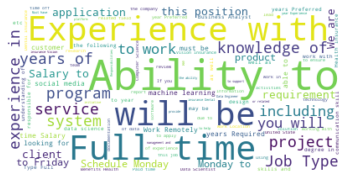

In [92]:
text = " ".join(description for description in df['combined_text'])
#text = salary_df['combined_text'][4]

#Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["to","sex","may"])

wordcloud = WordCloud(stopwords = stopwords,max_font_size=50, max_words=100, background_color='white').generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

"Full time, ability to, experience with, knowledge of".. These words seem to be common in all job descriptions. However, we want to see what skills, specifications data professionals should have, so this view is not very helpful. 

### Word Cloud of all Titles

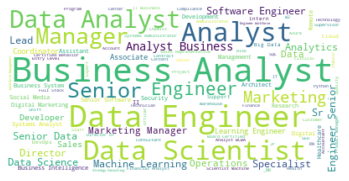

In [93]:
text = " ".join(title for title in df['Title'])

#Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["to","sex","may"])

wordcloud = WordCloud(stopwords = stopwords,max_font_size=50, max_words=100, background_color='white').generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word Cloud of one job

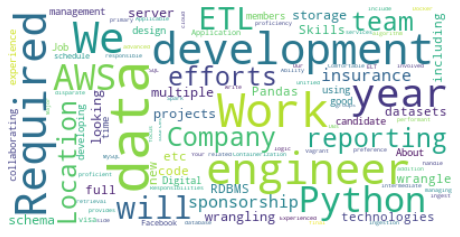

In [95]:
text = df['combined_text'][12]

#Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["to","sex","may","Ability to","Full time","Experience with", "Job Type"])

wordcloud = WordCloud(stopwords = stopwords,max_font_size=50, max_words=100, background_color='white').generate(text)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

When we look at individual job description, these keywords like data quality, analysis, define pop out. So maybe in the final application, we just pass in individual job description.